In [40]:
import os
import pretty_midi
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
def compute_polyphonicity(note, compare_note):
    if note.end < compare_note.start:
        return 0
    return min(note.end-compare_note.start, compare_note.end-compare_note.start)
        

def find_polyphonicity(notes):
    notes = sorted(notes, key=lambda k: k.start)
    notes = sorted(notes, key=lambda k: k.end)
    total_melody_time = notes[-1].end - notes[0].start
    
    total_polyphonic_time = 0.0
    for i, note in enumerate(notes):
        for j, compare_note in enumerate(notes[i+1:]):
            polyphonic_time = compute_polyphonicity(note, compare_note)
            if polyphonic_time == 0:
                break
            total_polyphonic_time += polyphonic_time
    return total_polyphonic_time/total_melody_time

In [20]:
def find_avg_note_time(notes):
    return np.mean([note.end - note.start for note in notes])

In [21]:
def find_unique_pitches(notes):
    return set([note.pitch for note in notes])

In [26]:
def analysis(midi_path):
    midi_files = os.listdir(midi_path)
    midi_files = [f for f in midi_files if f.endswith('.mid')]
    polyphonicities = []
    avg_note_times = []
    unique_pitches = []
    for midi_file in midi_files:
        midi = pretty_midi.PrettyMIDI(os.path.join(midi_path, midi_file))
        notes = midi.instruments[0].notes
        polyphonicities.append(find_polyphonicity(notes))
        avg_note_times.append(find_avg_note_time(notes))
        unique_pitches.extend(list(find_unique_pitches(notes)))
    return polyphonicities, avg_note_times, unique_pitches

In [27]:
%time polyphonicities, avg_note_times, unique_pitches = analysis('/home/nisarg/inhouse_research/imusic/third_party_repos/repo_data/sitar_lmd_files/')

CPU times: user 7.02 s, sys: 181 ms, total: 7.2 s
Wall time: 7.2 s


In [37]:
def draw_bar_plot(indices, xtick_labels, values, title_str, xlabel_str, ylabel_str):
    plt.figure(figsize = [10,7])
    plt.bar(indices, values)
    plt.xticks(indices, xtick_labels, rotation='vertical')
    plt.title(title_str)
    plt.ylabel(ylabel_str)
    plt.xlabel(xlabel_str)
    plt.tight_layout()
    plt.show()

In [36]:
def draw_hist_plot(values, title_str, xlabel_str, ylabel_str, nbins=20):
    plt.figure(figsize = [10,7])
    plt.hist(values, bins=nbins)
    plt.title(title_str)
    plt.ylabel(ylabel_str)
    plt.xlabel(xlabel_str)
    plt.show()

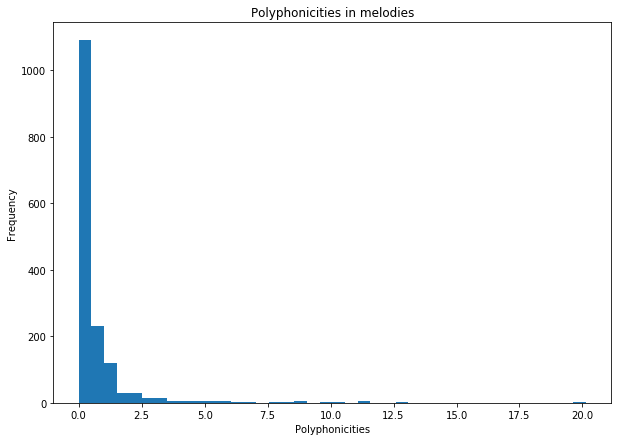

In [44]:
draw_hist_plot(polyphonicities, 'Polyphonicities in melodies', 'Polyphonicities', 'Frequency', nbins=40)

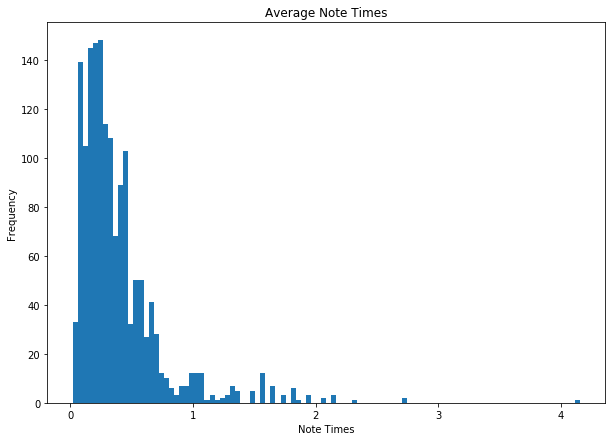

In [50]:
draw_hist_plot(avg_note_times, 'Average Note Times', 'Note Times', 'Frequency', nbins=100)

In [33]:
from collections import Counter

In [51]:
count_dict = Counter(unique_pitches)

In [57]:
sorted(Counter(unique_pitches).items(), key=lambda k: k[0])

[(2, 1),
 (7, 1),
 (9, 1),
 (11, 1),
 (12, 2),
 (14, 3),
 (16, 2),
 (17, 1),
 (19, 3),
 (20, 1),
 (21, 3),
 (22, 1),
 (23, 2),
 (24, 6),
 (25, 3),
 (26, 9),
 (28, 7),
 (29, 15),
 (30, 5),
 (31, 20),
 (32, 7),
 (33, 16),
 (34, 8),
 (35, 20),
 (36, 42),
 (37, 16),
 (38, 44),
 (39, 21),
 (40, 102),
 (41, 88),
 (42, 35),
 (43, 137),
 (44, 43),
 (45, 153),
 (46, 81),
 (47, 129),
 (48, 174),
 (49, 87),
 (50, 241),
 (51, 93),
 (52, 281),
 (53, 225),
 (54, 192),
 (55, 408),
 (56, 184),
 (57, 517),
 (58, 283),
 (59, 529),
 (60, 532),
 (61, 424),
 (62, 776),
 (63, 435),
 (64, 781),
 (65, 597),
 (66, 568),
 (67, 781),
 (68, 362),
 (69, 791),
 (70, 439),
 (71, 513),
 (72, 574),
 (73, 276),
 (74, 569),
 (75, 305),
 (76, 392),
 (77, 347),
 (78, 194),
 (79, 279),
 (80, 152),
 (81, 209),
 (82, 110),
 (83, 107),
 (84, 105),
 (85, 74),
 (86, 104),
 (87, 41),
 (88, 70),
 (89, 90),
 (90, 30),
 (91, 58),
 (92, 51),
 (93, 33),
 (94, 56),
 (95, 18),
 (96, 53),
 (97, 11),
 (98, 15),
 (99, 37),
 (100, 8),
 (10